# Gradient Boosting Decision Trees
Gradient boosting is also an ensamble learning method. Compared to random forest which generates trees sort of randomly, gradient boosting generated trees in a iterative way. Specifically, a new tree is generated to fit the **residuals** (data-prediction) from the previous tree. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

In [2]:
# generate the trajector
nsample = 400
X = np.linspace(0,100,nsample)
X = X[:,np.newaxis]
y = np.zeros(nsample)
idx = (X<10).ravel()
y[idx] = 5 + np.random.normal(0,0.1,(y[idx].size))
idx = np.logical_and(X>=10,X<30).ravel()
y[idx] = 2 + np.random.normal(0,0.1,(y[idx].size))
idx = np.logical_and(X>=30,X<60).ravel()
y[idx] = 3 + np.random.normal(0,0.1,(y[idx].size))
idx = np.logical_and(X>=60,X<101).ravel()
y[idx] = 4.5 + np.random.normal(0,1,(y[idx].size))

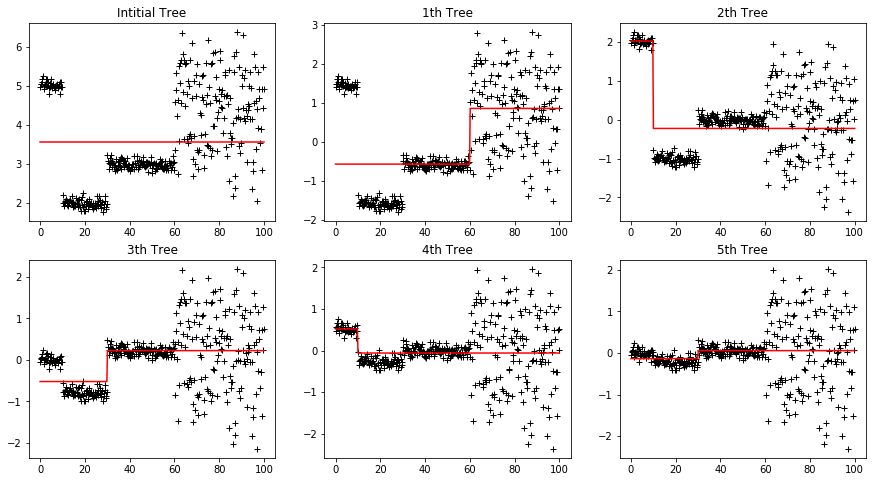

In [3]:
clf_gb = GradientBoostingRegressor(n_estimators=100,learning_rate=1,max_depth=1)
clf_gb.fit(X,y)
y_pred_gb = clf_gb.predict(X)

plt.figure(figsize=(15,8))

clf_tree = clf_gb.init_
y_pred = clf_tree.predict(X).flatten()
plt.subplot(2,3,1)
plt.plot(X,y,'k+')
plt.plot(X,y_pred,'r-')
plt.title('Intitial Tree')

y_resd = y - y_pred

for i in np.arange(1,6,1):
    clf_tree = clf_gb.estimators_[i-1,0]
    y_pred = clf_tree.predict(X)
    
    plt.subplot(2,3,i+1)
    plt.plot(X,y_resd,'k+')
    plt.plot(X,y_pred,'r-')
    plt.title('{}th Tree'.format(i))
    
    y_resd = y_resd - y_pred
plt.show()

## XGBoost and LightGBM

XGBoost and LightGBM are both specific implementations of Gradient Boosting.

They are much faster than traditional gradient boosting method implemented by scikit-learn. However, they are more sensitive to overfit the data so suggested to be used only for large dataset, especially the LightGBM. In this section, we apply them to a small dataset for the purpose on 

One big difference is they both grow **leaf-based** trees while traditional gradient boosting grow **level-based** trees.

Website: https://xgboost.readthedocs.io/en/latest/, https://lightgbm.readthedocs.io/en/latest/

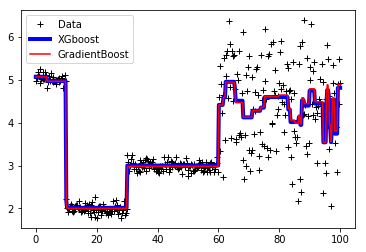

In [4]:
clf_xgb = XGBRegressor(n_estimators=100,learning_rate=1,max_depth=1)
clf_xgb.fit(X,y)
y_pred_xgb = clf_xgb.predict(X)

plt.figure(figsize=(6,4))
plt.plot(X,y,'k+')
plt.plot(X,y_pred_xgb,'b-',linewidth=4)
plt.plot(X,y_pred_gb,'r-',linewidth=1.5)
plt.legend(('Data','XGboost','GradientBoost'))
plt.show()


### Tuning Parameters

**learning_rate**

1. Too small settings will result in slower learning so that more estimators are needed. There is a trade-off between learning_rate and n_estimators
2. Too large settings may cause divergence
3. Good settings can usually capture a reasonable fit within reasonable iterations



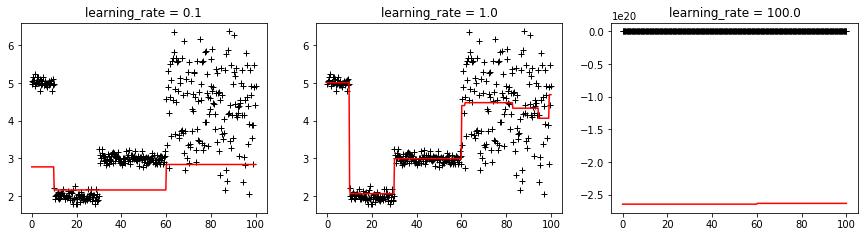

In [5]:
eta_val = np.array([0.1,1,100])
plt.figure(figsize=(15,3.5))
for i in np.arange(3):
    clf = XGBRegressor(learning_rate=eta_val[i],n_estimators=10,max_depth=1,random_state=0)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    
    plt.subplot(1,3,i+1)
    plt.plot(X,y,'k+')
    plt.plot(X,y_pred,'r-')
    plt.title('learning_rate = {}'.format(eta_val[i]))
plt.show()

**min_split_loss**

minimum loss reduction required to make a further partition on a leaf node of the tree. 
It is a parameter kind of controling the tree depth.
If the loss reduction is smaller than the parameter in which case we think the it is getting less and less efficient to split in to more branch, so we stop partitioning.

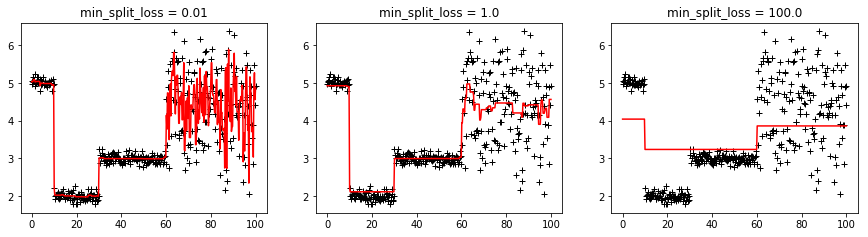

In [7]:
gamma_val = np.array([0.01,1,100])
plt.figure(figsize=(15,3.5))
for i in np.arange(3):
    clf = XGBRegressor(min_split_loss=gamma_val[i],n_estimators=100000,random_state=1)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    
    plt.subplot(1,3,i+1)
    plt.plot(X,y,'k+')
    plt.plot(X,y_pred,'r-')
    plt.title('min_split_loss = {}'.format(gamma_val[i]))
plt.show()